In [297]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns 
from urllib.request import urlopen
import re
headers = {'User-Agent':'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_2) AppleWebKit/601.3.9 (KHTML, like Gecko) Version/9.0.2 Safari/601.3.9'}
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import requests
import time, os
chromedriver = "C:/Program Files (x86)/Google/Chrome/Application/chromedriver.exe" # path to the chromedriver executable
os.environ["webdriver.chrome.driver"] = chromedriver
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge #ordinary linear regression + w/ ridge regularization
from sklearn.preprocessing import StandardScaler
import scipy.stats as stats


In [232]:

url2 = 'https://johrh.com/shop/page/16/?gclid=CjwKCAjw-sqKBhBjEiwAVaQ9a8Dvuh6LeMyG1dMXNesVl9UyKE2VvsEJ7fE5VTZLEiwZo6vGm0572BoCRNwQAvD_BwE&shop_load=products&_=1632949274242'
driver = webdriver.Chrome(chromedriver)
driver.get(url2)
for i in range(5):
    #Scroll
    driver.execute_script(
        "window.scrollTo(0, document.documentElement.scrollHeight);" #Alternatively, document.body.scrollHeight
    )
    
    #Wait for page to load
    time.sleep(2)
soup = BeautifulSoup(driver.page_source, 'html5lib')

In [233]:
len(soup.find_all('a' , class_='nm-shop-loop-thumbnail-link woocommerce-LoopProduct-link'))

48

In [234]:
def Create_panda(url_3):
    Abaya = []
    response=requests.get(url_3,headers=headers)
    soup=BeautifulSoup(response.content,'html5lib')
    try:
        # Color
        Abaya.append(soup.find_all('a', rel='tag')[-3].text)
    except:
        Abaya.append('other')
        '''
        So bad
        '''
        # price
    try:
        Abaya.append(float(re.sub('\D', '', soup.find_all('bdi')[0].text)))
        
        # Gmash
    except:
        Abaya.append(200)
        '''
        So bad
        '''
    try:
        Abaya.append(soup.find_all('a', rel='tag')[1].text)
        # Closed
    except:
        Abaya.append('other')
        '''
        So bad
        '''
    try:
        Abaya.append(soup.find_all('a', rel='tag')[2].text)
        
        # reviwing
    except:
        Abaya.append(0)
        '''
        So bad
        '''
    try:
        Abaya.append(soup.find_all('a', href='#tab-reviews')[0].find('span').text)
        # Rating
    except:
        Abaya.append('other')
        '''
        So bad
        '''
    try:
        Abaya.append(float(soup.find_all('strong', class_='rating')[0].text))
    except:
        Abaya.append(0)
    try:
        Abayat[soup.find_all('span', class_='sku')[0].text] = Abaya
    except:
        Abaya.append('other')
        '''
        So bad
        '''

In [235]:
Abayat = {}
for x , i in enumerate (soup.find_all('a' , class_='nm-shop-loop-thumbnail-link woocommerce-LoopProduct-link')):
    url_3 =i.get('href')
    Create_panda(url_3)
    #print('# ---------------------------------------------')
print('Finish')

Finish


In [237]:
Abayat_df = pd.DataFrame(Abayat).T  # Convert The Data From Dictionary to Data Frame
Abayat_df.columns = [ 'color', 'price','style', 'how_closed', 'number_review' , 'rating']

In [262]:
ab = Abayat_df.copy()

In [263]:
ab['price'] = ab['price'].apply(lambda x: float(x))
ab['number_review'] = ab['number_review'].apply(lambda x: 0 if x == 'other' else float(x))
ab['rating'] = ab['rating'].apply(lambda x: float(x))

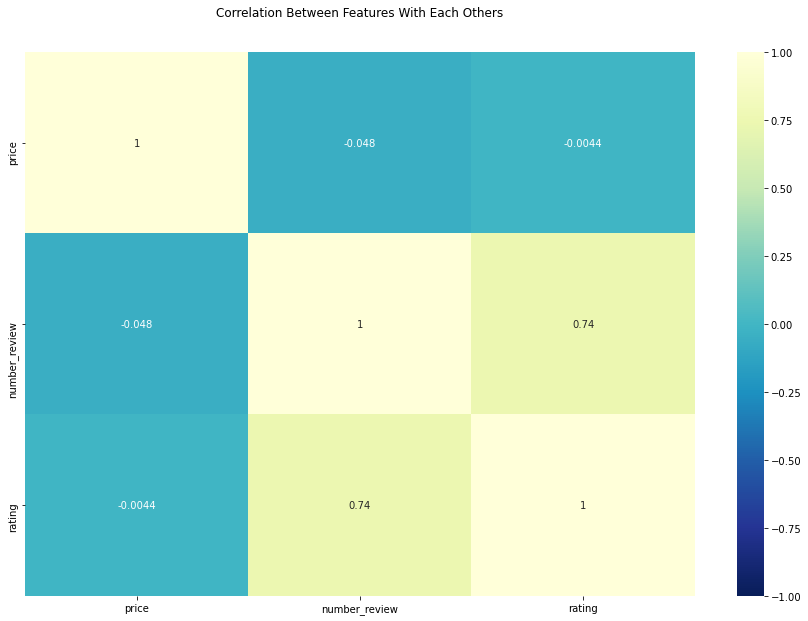

In [264]:
fig, ax = plt.subplots(figsize=(15,10)) # Sample figsize in inches

sns.heatmap(ab.corr(), cmap="YlGnBu_r",annot=True, vmin=-1, vmax=1, ax=ax);

ax.set_title('Correlation Between Features With Each Others\n\n')
plt.show()

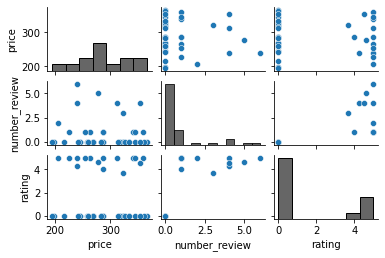

In [265]:
sns.pairplot(ab,  height=1.2, aspect=1.5, diag_kws={"hue": None, "color": ".2"})

In [ ]:
ab.columns

In [266]:
ab = pd.get_dummies(ab)

In [267]:
X = ab.drop(columns=["price"])
Y = ab.loc[:,"price"]

In [268]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.25)
X2_train, X_val, Y2_train, Y_val = train_test_split(X_train, Y_train, test_size=.25)

In [269]:
lm = LinearRegression()

In [274]:
lm.fit(X2_train, Y2_train)

LinearRegression()

In [275]:
lm.score(X_val,Y_val)

0.6683422054013672

In [276]:
lm.score(X_test,Y_test)

-1.742681397573962

In [278]:
pre = lm.predict(X_test)

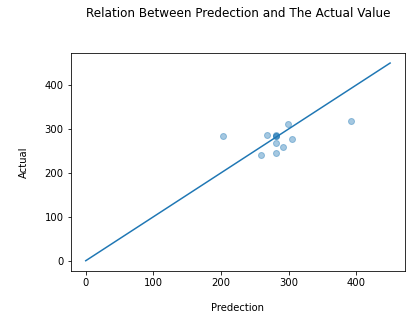

In [280]:

plt.scatter(pre, Y_test, alpha=.4)
plt.plot(np.linspace(0,450,500), np.linspace(0,450,500))
plt.title("Relation Between Predection and The Actual Value\n\n") ## Maram
plt.xlabel("\nPredection\n")
plt.ylabel("\nActual\n")
plt.show()


In [283]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X2_train.values)
X_val_scaled = scaler.transform(X_val.values)
alpha = [ 0.1 , 0.5 , 0.8 ]
for j in alpha:
    lm_reg = Ridge(alpha=j)
    lm_reg.fit(X_train_scaled, Y2_train)
    print (lm_reg.score(X_val_scaled, Y_val))
    print('alpha : ' , j)
    print('-----------')


0.6575752560158941
alpha :  0.1
-----------
0.6670932403496468
alpha :  0.5
-----------
0.6724452185174943
alpha :  0.8
-----------


In [287]:
X_test_scaled = scaler.transform(X_test.values)       
lm_reg = Ridge(alpha=0.8)
X_train_scaled_origi = scaler.fit_transform(X_train.values)
lm_reg.fit(X_train_scaled_origi, Y_train)
print(lm_reg.score(X_test_scaled,Y_test))
pred = lm_reg.predict(X_test_scaled)

-3.671708033935465


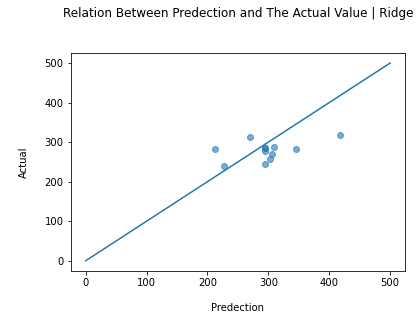

In [289]:
plt.scatter(pred, Y_test, alpha=.6 )
plt.plot(np.linspace(0,500,500), np.linspace(0,500,500))
plt.title("Relation Between Predection and The Actual Value | Ridge\n\n") # Maram
plt.xlabel("\nPredection\n")
plt.ylabel("\nActual\n")
plt.show()

(48,)


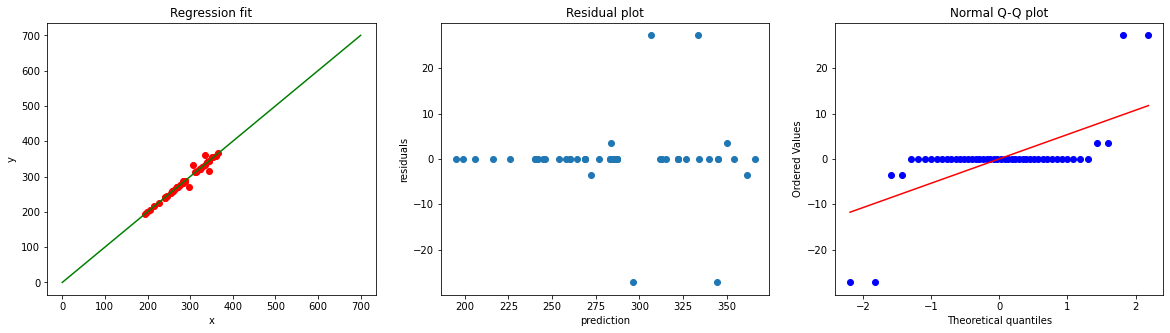

In [299]:
diagnostic_plot(X, Y)

In [298]:
def diagnostic_plot(x, y):
    plt.figure(figsize=(20,5))
    
    rgr = LinearRegression()
    rgr.fit(x,y)
    pred = rgr.predict(x) # "regression prediction"
    print(y.shape)
    plt.subplot(1, 3, 1)
    #plt.scatter(pred,y) # "scatter"
    plt.plot(np.linspace(0,700,500), np.linspace(0,700,500) , color="green")
    plt.scatter(pred, y, color='red',linewidth=1)
    plt.title("Regression fit") 
    plt.xlabel("x")
    plt.ylabel("y")
    
    plt.subplot(1, 3, 2)
    res = y - pred
    plt.scatter(pred, res) # "scatter supposed to have no pattern"
    plt.title("Residual plot") 
    plt.xlabel("prediction")
    plt.ylabel("residuals")
    
    plt.subplot(1, 3, 3)
    #Generates a probability plot of sample data against the quantiles of a 
    # specified theoretical distribution 
    stats.probplot(res, dist="norm", plot=plt) # "normal qq plot"
    plt.title("Normal Q-Q plot")